In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt


def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                       c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                       alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

Визуализация набора данных MNIST из [статьи](https://habr.com/ru/company/ods/blog/325654/)

In [ ]:
from sklearn import datasets


digits = datasets.load_digits()
X = digits.data
y = digits.target

In [ ]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [ ]:
X.shape

(1797, 64)

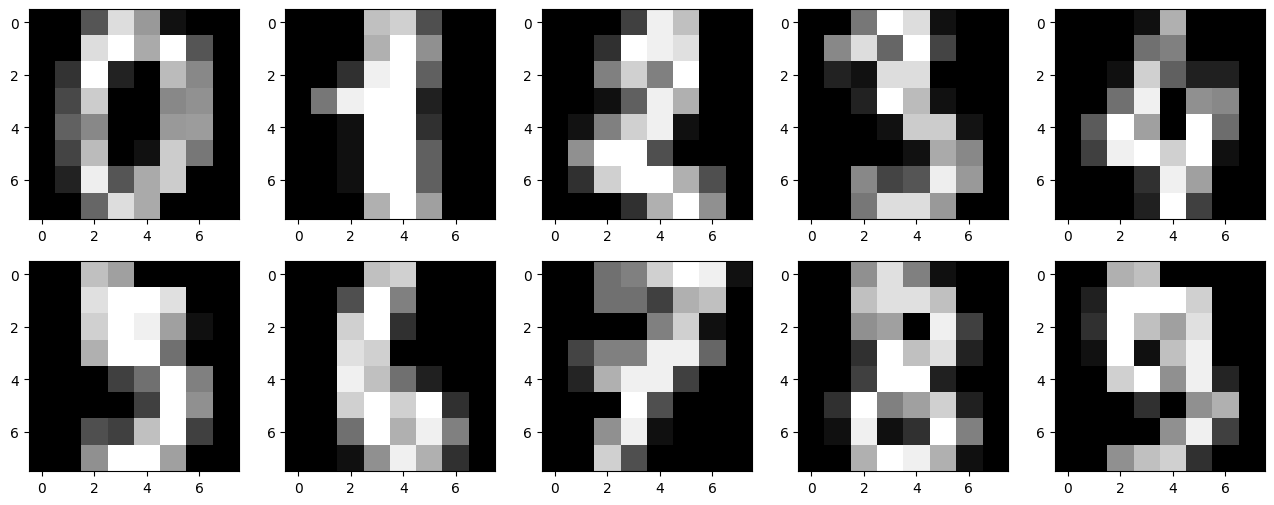

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

**PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1797, 2)

In [ ]:
import pandas as pd

dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

,component_1,component_2
0,0.061137,1.378117
1,0.375738,-1.354664
2,0.370527,-0.675976
3,-0.997074,0.250191
4,1.484399,0.168711


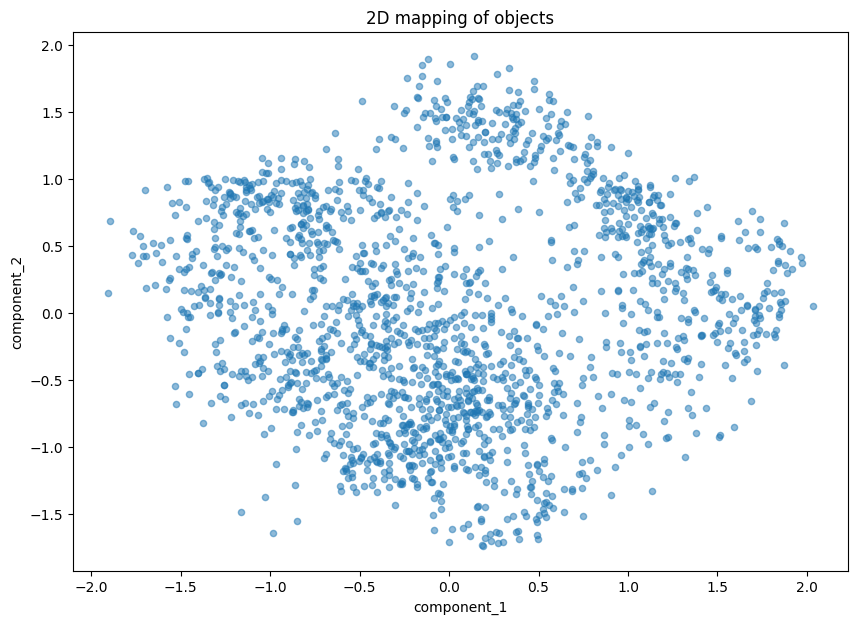

In [ ]:
display_components_in_2D_space(components_X_reduced)

**TSNE**

In [ ]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, perplexity=25)  # От 1 до 50

X_tsne = tsne.fit_transform(X)

CPU times: user 21.7 s, sys: 194 ms, total: 21.9 s
Wall time: 12.9 s


In [ ]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

,component_1,component_2
0,-1.630370,59.059635
1,11.273793,-9.389958
2,-12.268087,-23.682076
3,-37.211529,6.974219
4,44.221561,-9.524301


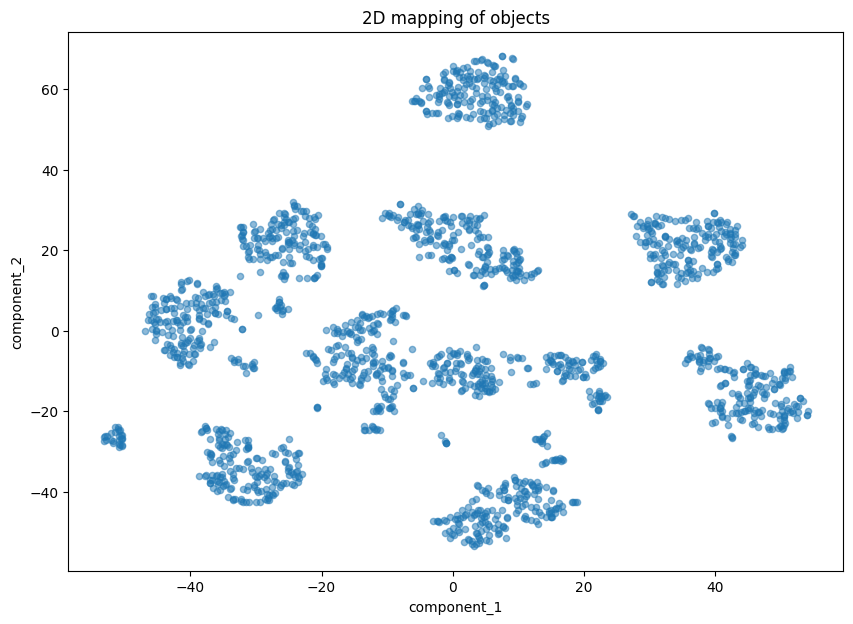

In [ ]:
display_components_in_2D_space(components_X_tsne)

**KMeans**

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')
labels_clast

0       3
1       6
2       4
3       0
4       2
       ..
1792    7
1793    3
1794    4
1795    7
1796    4
Name: clusters, Length: 1797, dtype: int32

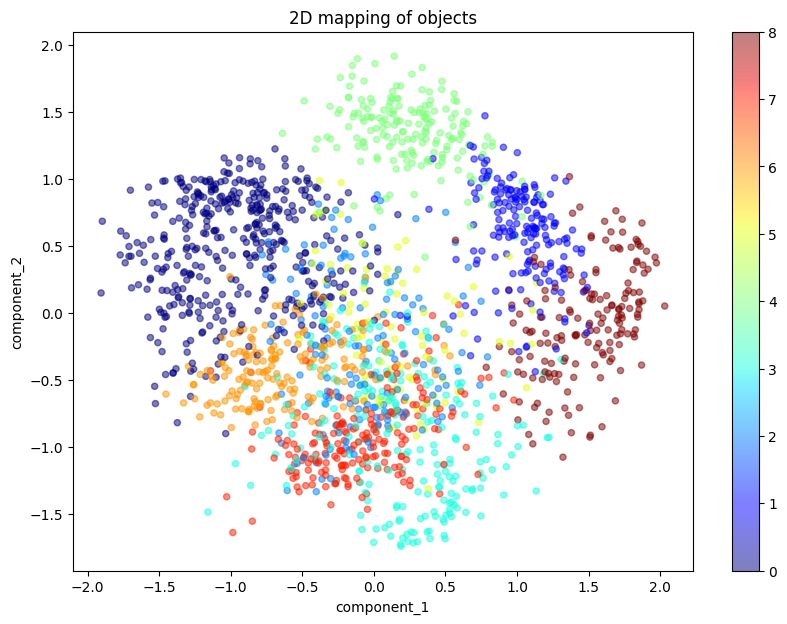

In [ ]:
display_components_in_2D_space(components_X_reduced, labels=labels_clast)

In [ ]:
kmeans.cluster_centers_.shape

(9, 64)

In [ ]:
centr = pca.transform(kmeans.cluster_centers_)
centr

array([[-0.95922049,  0.46832012],
       [ 1.02068632,  0.58722134],
       [-0.08529277, -0.29558028],
       [ 0.17363104, -0.9014567 ],
       [ 0.24663985,  1.33344398],
       [ 0.15983247, -0.15972184],
       [-0.62240186, -0.41532435],
       [-0.08350308, -0.91112616],
       [ 1.48319202, -0.06407464]])

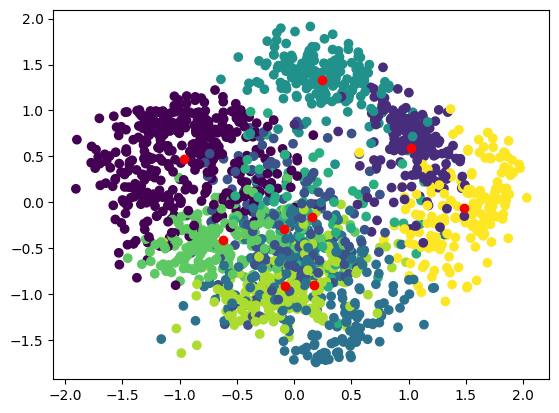

In [ ]:
plt.scatter(components_X_reduced.iloc[:, 0], components_X_reduced.iloc[:, 1], c=labels_clast)
plt.scatter(centr[:, 0], centr[:, 1], c='r');

Применение моделей понижения размерности:
1. Визуализация
2. Сжатие с сохранением смысла
3. Новые абстрактные признаки

In [ ]:
centr = tsne.transform(kmeans.cluster_centers_)
# centr

AttributeError: 'TSNE' object has no attribute 'transform'

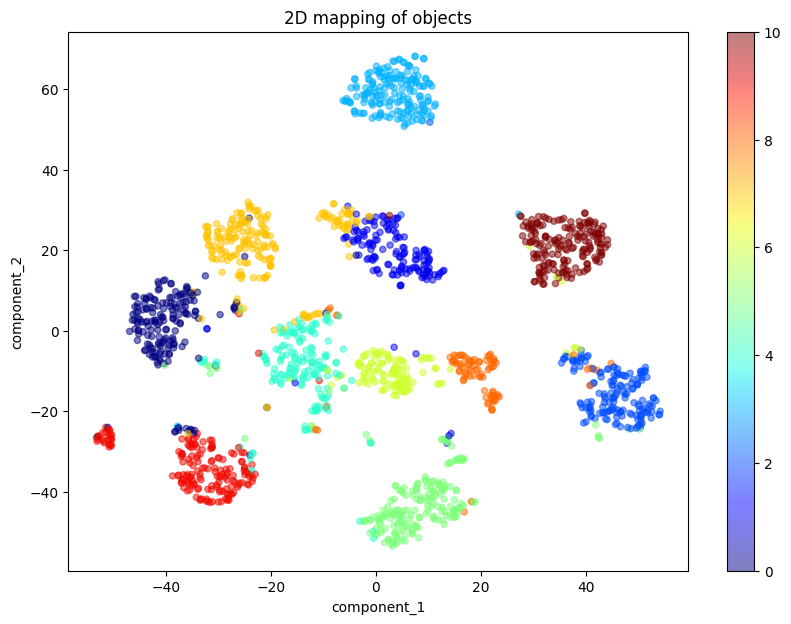

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist


def apply_elbow_method(X):
    """Визуализация для метода 'локтя'"""

    distortions = []
    K = range(2,30)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        # distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

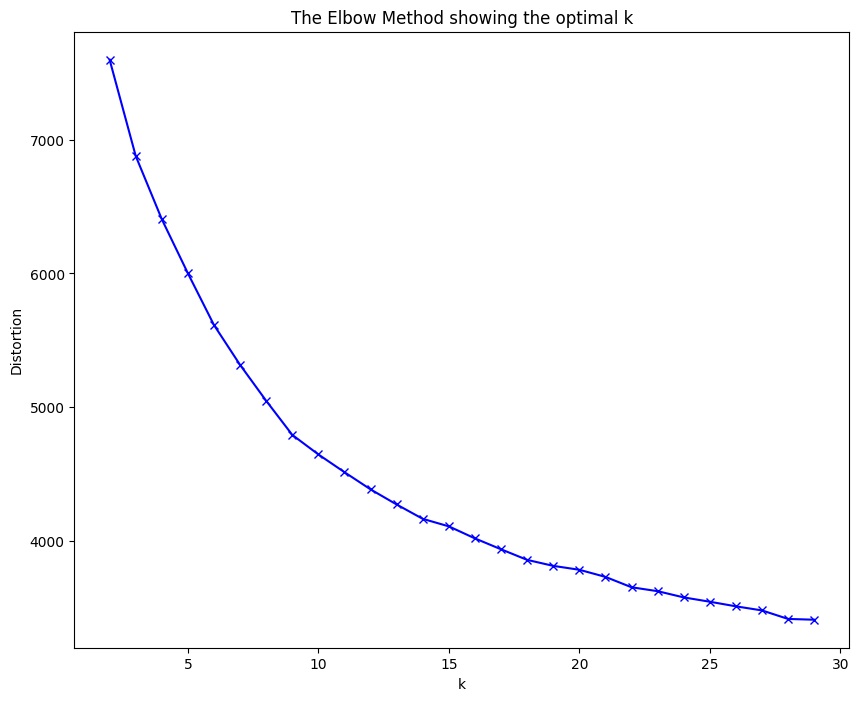

In [ ]:
apply_elbow_method(X)

**DBSCAN**

In [ ]:
def display_clusters_distribution(labels_clust):
    """Визуализация распределения классов по кластерам"""
    plt.figure(figsize=(8,5))

    data = labels_clust.value_counts()
    plt.bar(data.index, data.values)

    plt.xlabel('Clusters')
    plt.xticks(data.index)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

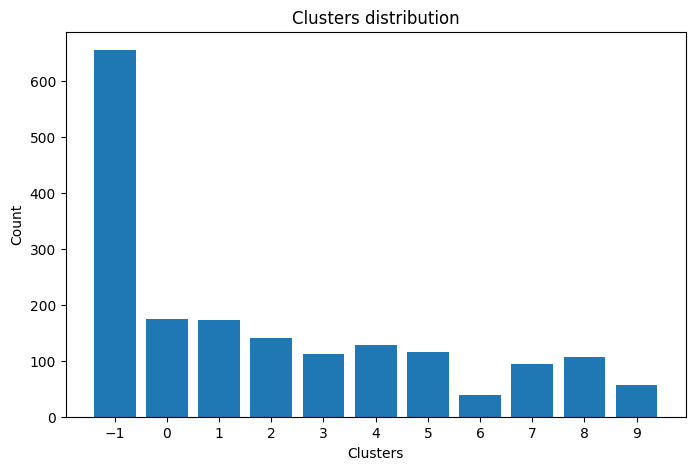

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=25)
labels_clast = dbscan.fit_predict(X)
labels_clast = pd.Series(labels_clast)

display_clusters_distribution(labels_clast)

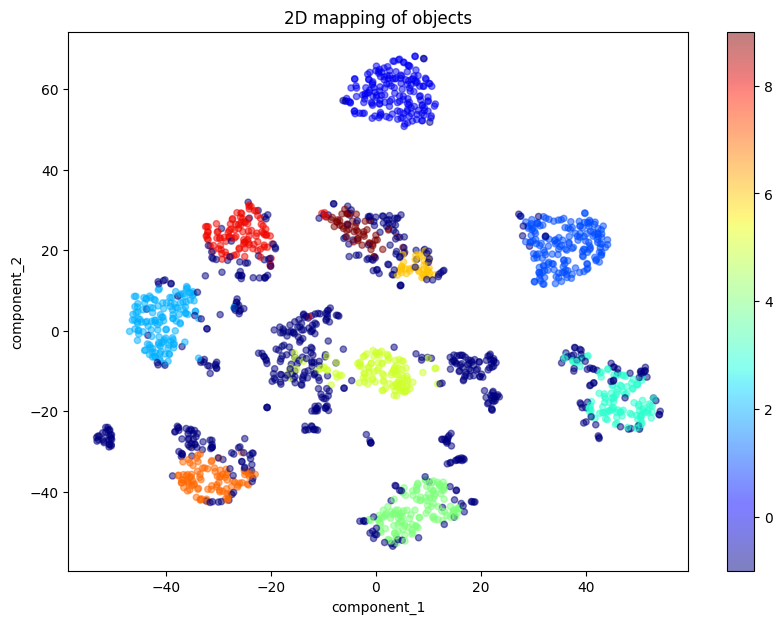

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

**AgglomerativeClustering**

[Plot Hierarchical Clustering Dendrogram¶
](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

In [ ]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

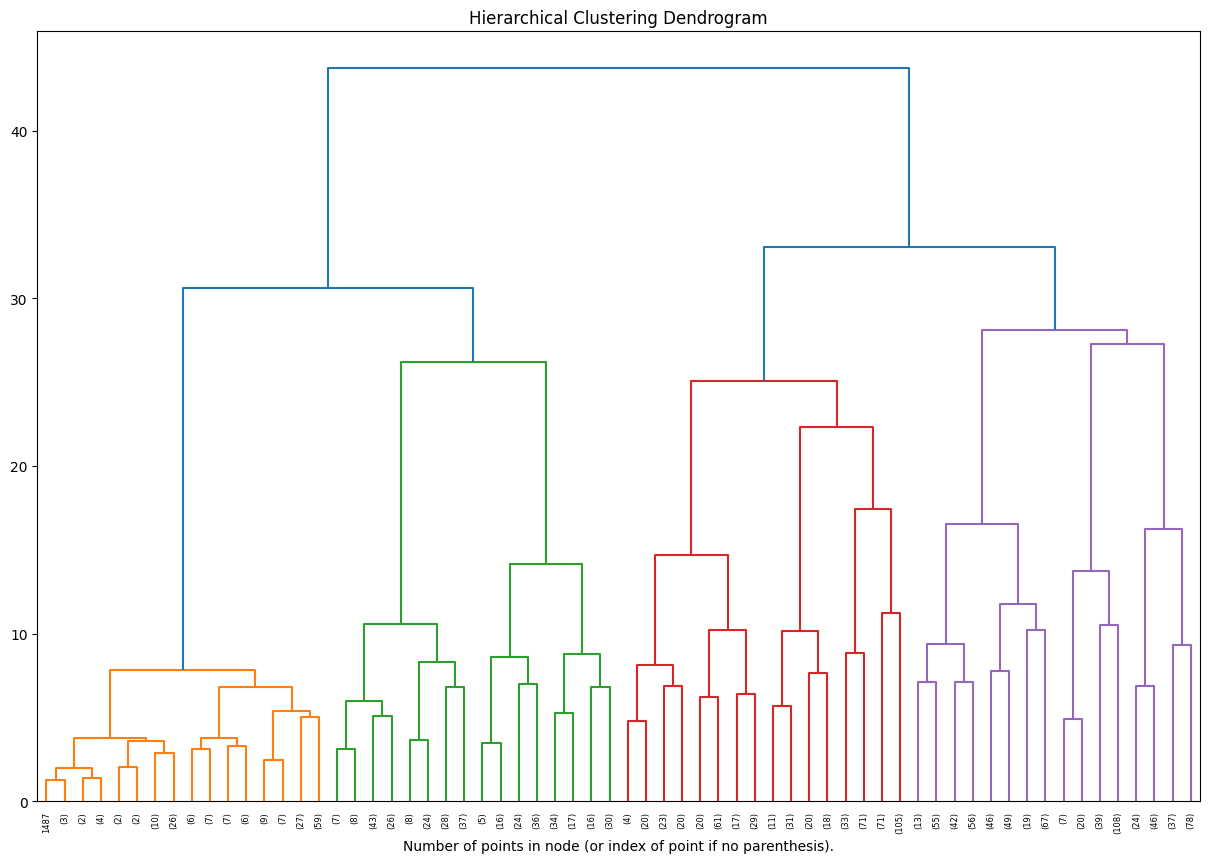

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram

plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

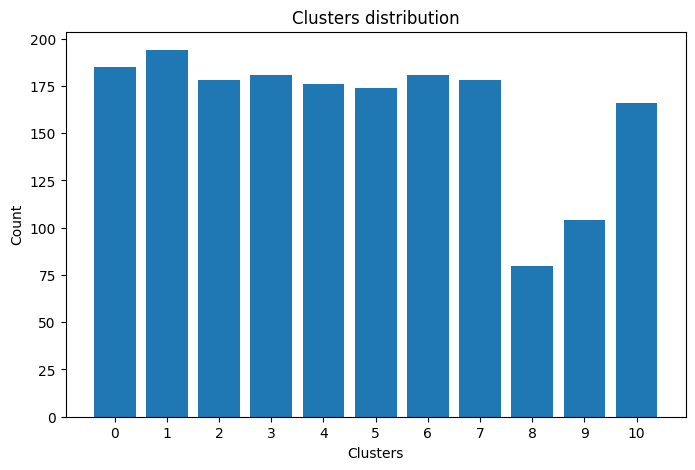

CPU times: user 560 ms, sys: 61.8 ms, total: 622 ms
Wall time: 1.16 s


In [ ]:
%%time
aggl = AgglomerativeClustering(n_clusters=11)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

display_clusters_distribution(labels_clast)

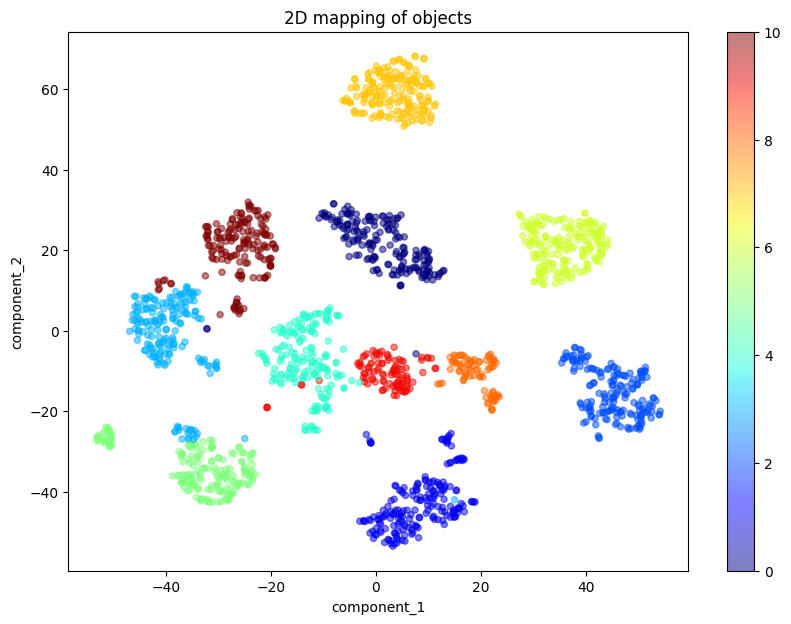

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

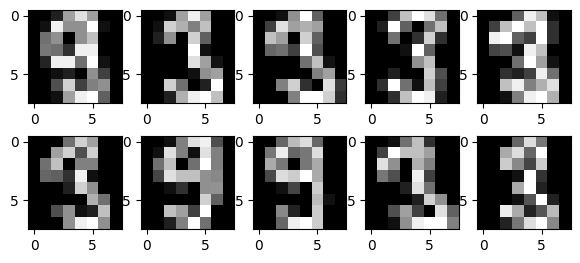

In [ ]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 10][i+50,:].reshape([8,8]), cmap='gray')

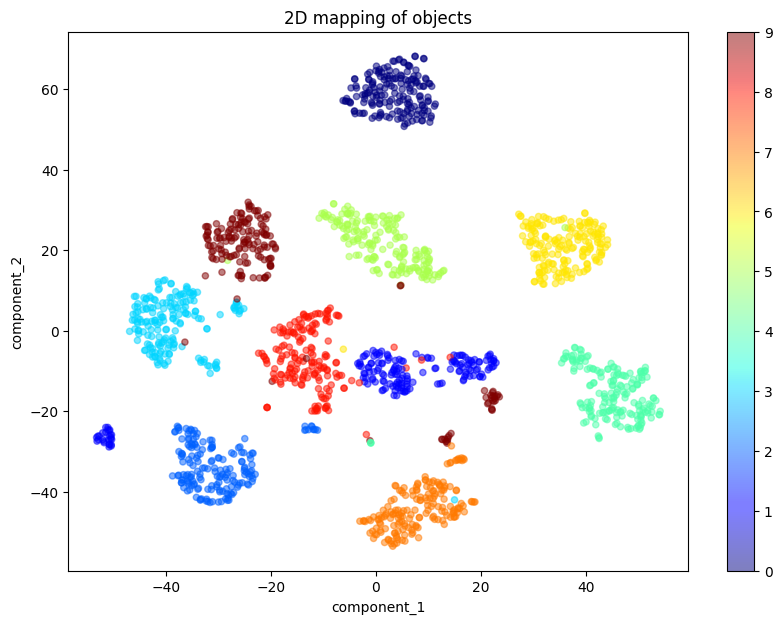

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=y)